Use pyaudio to record sound from users

In [1]:
import sounddevice as sd
from scipy.io.wavfile import write
import librosa, pickle
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

%matplotlib inline

In [3]:
## padding y with 0's in every row so that it has max_col columns.
def padVoice(y, max_col):
    return np.pad(y, [(0,0), (0, max_col - y.shape[1])], mode = 'constant')

In [11]:
fs = 44100  # Sample rate
seconds = 1.25  # Duration of recording
record_name = 'temp/temp_sound_record.mp3'

print('Record will start in\n3')
time.sleep(1)
print('2')
time.sleep(1)
print('1')
time.sleep(1)
print('GO!!')


### save the record to .mp3 at the current dir
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
write(record_name, fs, myrecording)

print('Record saved at', record_name, '\nVoice being processed...', record_name)

Record will start in
3
2
1
GO!!
Record saved at temp/temp_sound_record.mp3 
Voice being processed... temp/temp_sound_record.mp3


In [12]:
## load the file into Librosa
y, sr = librosa.load(record_name)

In [13]:
##This is your record
##clear all output before running this chunk

print('This is your record:')
ipd.Audio(record_name) # load a local WAV file

This is your record:


This is your record wave plot:


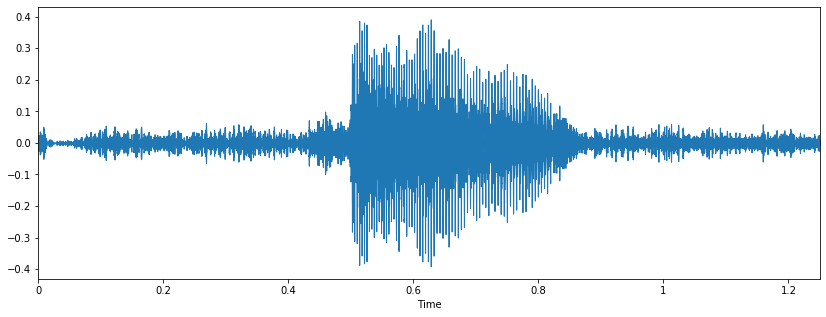

In [7]:
print('This is your record wave plot:')
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

Besides the .mp3 file, MFCC of the audio will also be extracted and saved as a .pkl file for the later prediction. First, we need to make the input size to be 13*239 which is the size the model is trained for. 

In [14]:
z = librosa.feature.mfcc(y=y, sr=sr, hop_length=128, n_mfcc=13)
print('The current shape is ', z.shape)

The current shape is  (13, 216)


In [15]:
##pad the input with 0 at the end to make it 239
ps = padVoice(z, 239)
print('The padded input shape is ', ps.shape)

The padded input shape is  (13, 239)


In [16]:
##save the padded process record to .pkl
record = open(r'temp/temp_record.pkl', 'wb')
pickle.dump(ps, record)
record.close()
print('The processed record is ready for the model. See \'temp/temp_record.pkl\'')

The processed record is ready for the model. See 'temp/temp_record.pkl'
